In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_path = '/content/drive/My Drive/models/your_model_name.h5'

In [ ]:
from tensorflow.keras.models import load_model

model = load_model(model_path)


Saving Screenshot 2025-04-08 232213.png to Screenshot 2025-04-08 232213.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction: Real (Confidence: 0.00)


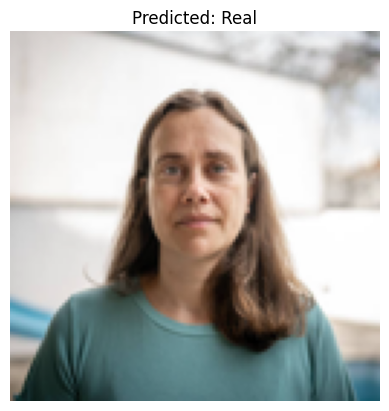

In [ ]:
# Upload image
uploaded = files.upload()

# Loop through uploaded files
for fn in uploaded.keys():
    # Load and preprocess image
    img = Image.open(fn).resize((128, 128)).convert('RGB') # Convert to RGB
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)  # Only once!

    # Predict using loaded model
    prediction = model.predict(img_array)[0][0]
    label = "Fake" if prediction > 0.5 else "Real"

    # Show result
    print(f"Prediction: {label} (Confidence: {prediction:.2f})")
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
    plt.show()

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00


In [ ]:
!pip install -q gradio

import gradio as gr
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load your saved model
model = load_model("/content/drive/My Drive/models/your_model_name.h5")  # Updated file name
# Define prediction function
def predict_image(image):
    img = image.resize((128, 128)).convert('RGB')
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = "Fake" if prediction > 0.5 else "Real"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    return f"Prediction: {label} (Confidence: {confidence:.2f})"

# Launch UI
gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Deepfake Image Detection",
    description="Upload an image to check if it's Real or Fake"
).launch(share=True)  # share=True gives you a public link


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.0 MB/s eta 0:00:00


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c75d48adb1566c861a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
